# Rising Food Prices and Poverty in Latin America and the Caribbean:
## Effect of Ukrainian invasion

_Lina Arias, Laura Goyeneche; Roberto Sanchez; Luis Tejerina; Eric Torres_

In [1]:
%%capture
%matplotlib inline
from scldata_simulation import * 

In [2]:
# Instantiate simulator 
scldata_simulation = SCLdataSimulation()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
# price shock components 
# - You can choose which components are affected by exogenous impact 
shock_component = [#'Alimentos fuera del hogar',
                   #'Azúcares', 'Bebidas no alcohólicas',
                   #'Carnes, aves y huevos',
                   #'Frutas', 
                   'Granos', 'Panes y\ncereales',
                   #'Grasas', 'Leguminosas',
                   #'Lácteos', 
                   #'Productos no especificados previamente', 'Raíces y\ntubérculos', 'Vegetales'
                  ]

# shock_weight
# - pct impact of exogenous impact
shock_weight = 0.10

# population affected - shock_weight
# ToDo(rsanchezavalos)
# - specify whether the impact is focused on a subgroup of the population
# shock_population = {'sec_agri': 0}

# income_growth 
# ToDo(rsanchezavalos)
# - Control by GDP growth
# gdp_growth = .1

# population affected - income_growth
# ToDo(rsanchezavalos)
# - specify whether the income growth is focused on a subgroup of the population
# gdp_population = {'sec_agri': 1}

In [4]:
# Get the weight of the shock component
scldata_simulation.get_poverty_lines(shock_component)[['pais_c', 'weight']].drop_duplicates().head(5)

,pais_c,weight
0,ARG,0.170
33,BHS,0.182
66,BLZ,0.290
99,BOL,0.170
132,BRA,0.255


## Deltas by Country

In [ ]:
change = scldata_simulation.simulate_change(shock_component, shock_weight)
country_group = scldata_simulation.country_results(change)
country_group.sort_values('pais_c').head(10)

<Figure size 1200x800 with 0 Axes>

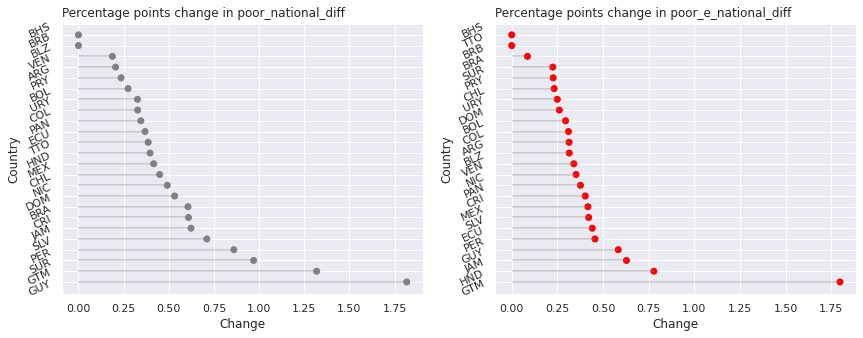

In [9]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
variables = ['poor_national', 'poor_e_national']
for variable in variables:
    country_group[variable +'_diff'] = (country_group[variable + '_delta'] - country_group[variable])*100  
variables = [x + '_diff' for x in variables]
variables.extend(['anio_c', 'pais_c'])
country_group_melt = pd.melt(country_group[variables],id_vars=['anio_c', 'pais_c'],var_name='metrics', value_name='values')

country_group_melt['color'] = np.where(country_group_melt['metrics']=='poor_national_diff', 'grey', 'red')

# Figure by poverty level 
plt.figure(figsize = (22,5))

for i,variable in enumerate(['poor_national_diff', 'poor_e_national_diff']):
    ordered_df = country_group_melt[country_group_melt.metrics==variable]
    ordered_df = ordered_df.sort_values(by=['values'], ascending=False)
    # Subplot
    plt.subplot(1,3,i+1)
    my_range=range(1,len(ordered_df.index)+1)
    plt.hlines(y = my_range, xmin=0, 
               xmax = ordered_df['values'], 
               color ='grey', alpha=0.4)
    plt.scatter(ordered_df['values'], my_range, color=ordered_df.color, alpha=1) 
    plt.yticks(my_range, ordered_df['pais_c'])
    plt.title("Percentage points change in {0}".format(variable), loc='left')
    plt.xlabel('Change')
    plt.ylabel('Country')
    plt.yticks(rotation = 25)
    
plt.show()

### By country (population)

## Deltas by Group

<Figure size 3000x800 with 0 Axes>

<Figure size 3000x800 with 0 Axes>

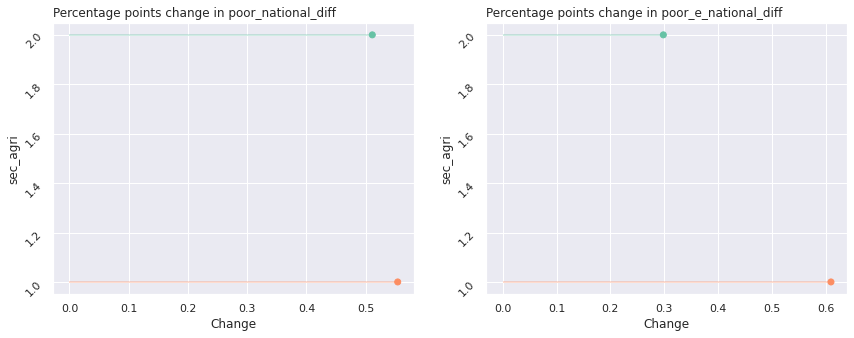

In [10]:
# ToDO(rsanchezavalos) - fix change to sec agri
group = ['sec_agri']
scldata_simulation.plot_group(change=change, group= group)

<Figure size 3000x800 with 0 Axes>

<Figure size 3000x800 with 0 Axes>

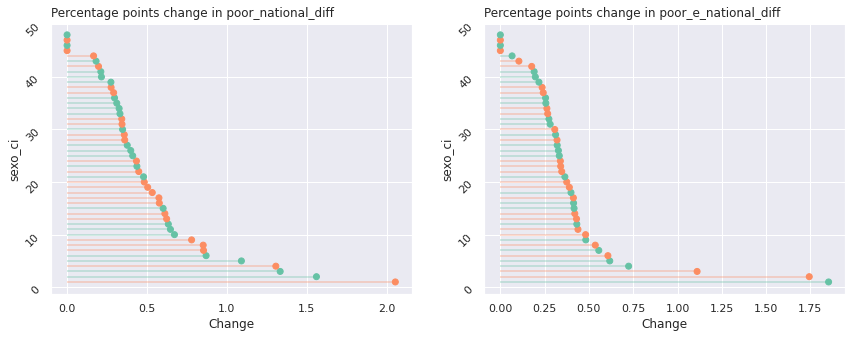

In [9]:
group = ['pais_c', 'sexo_ci']
scldata_simulation.plot_group(change=change, group= group)

#### Distribution of poverty rate changes in percentual points by country

In [ ]:
shock_weights = [i/100 for i in range(10,70,10) ]
simulations_concat = scldata_simulation.simulate_changes(shock_component, shock_weights)  

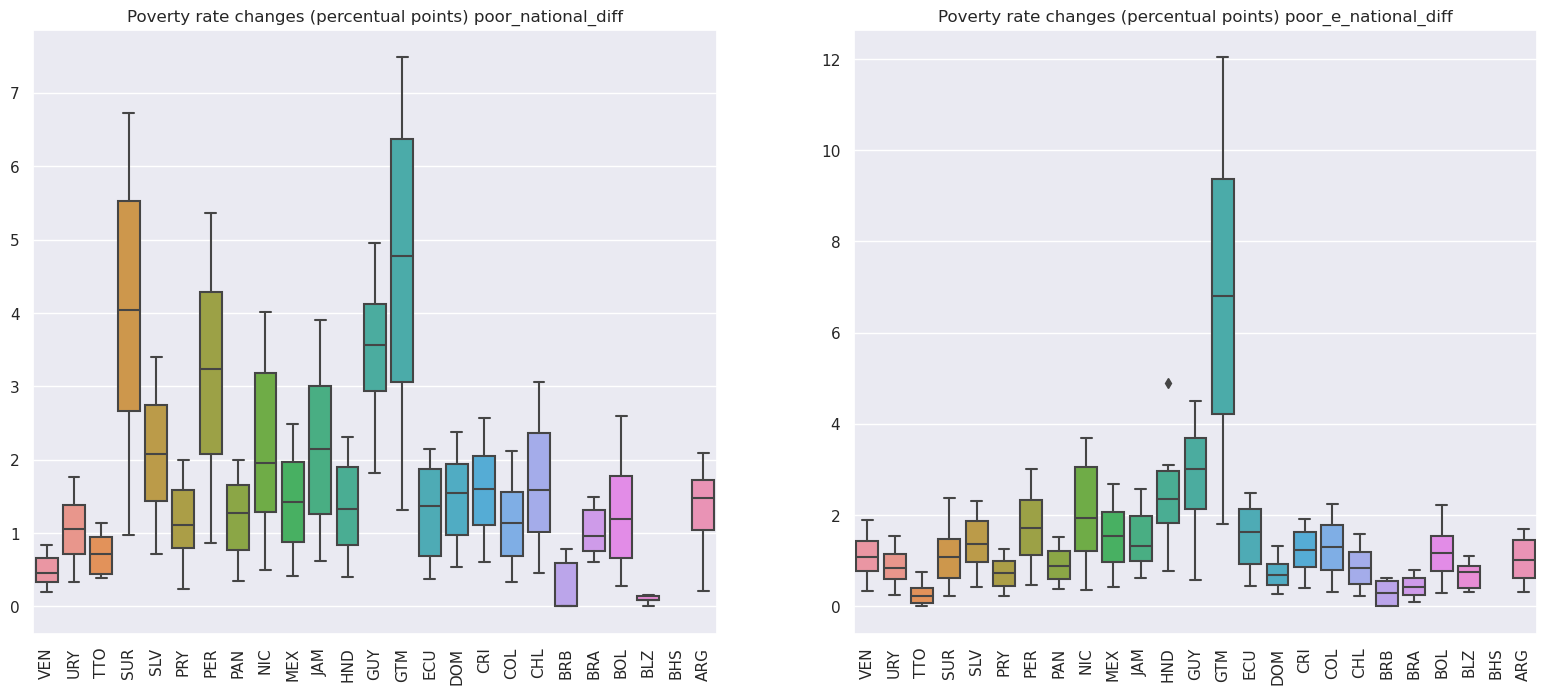

In [13]:
fig=plt.figure(figsize=(30,8), dpi= 100, facecolor='w', edgecolor='k')

variables = ['poor_national', 'poor_e_national']
for variable in variables:
    simulations_concat[variable +'_diff'] = (simulations_concat[variable + '_delta'] - simulations_concat[variable])*100  

variables = [x + '_diff' for x in variables]
variables.extend(['anio_c', 'pais_c'])

simulations_melt = pd.melt(simulations_concat[variables],id_vars=['anio_c', 'pais_c'],
                           var_name='metrics',
                           value_name='values')
simulations_melt['color'] = np.where(simulations_melt['metrics']=='poor_national_diff', 'grey', 'red')



for i,variable in enumerate(['poor_national_diff', 'poor_e_national_diff']):
    ordered_df = simulations_melt[simulations_melt.metrics==variable]
    ordered_df = ordered_df.sort_values(by=[ 'pais_c'], ascending=False)
    
    # Subplot
    plt.subplot(1,3,i+1)
    #plt.figure(figsize = (9,5))
    my_range=range(1, len(ordered_df.index)+1 )
    
    # Distribution in changes in PL
    ax = sns.boxplot(x = 'pais_c', y = 'values', data = ordered_df)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Poverty rate changes (percentual points) ' + variable)
    ax.tick_params(axis='x', rotation=90)

plt.show()